<a href="https://colab.research.google.com/github/GianFederico/MD-repo-Computer_Vision/blob/main/knn_for_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader
downloader.download("dog",limit = 15, output_dir = 'images')
downloader.download("sheep",limit = 15, output_dir = 'images')

In [ ]:
import os
import cv2
path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/images/images/dog'
for filename in os.listdir(path):
  i = cv2.imread(os.path.join(path,filename))
  print(i.shape) 

(168, 300, 3)
(159, 317, 3)
(720, 1280, 3)
(409, 615, 3)
(533, 800, 3)
(168, 300, 3)
(168, 300, 3)
(228, 221, 3)
(182, 277, 3)
(183, 275, 3)
(214, 236, 3)
(168, 300, 3)
(247, 204, 3)
(1733, 2600, 3)
(183, 275, 3)


In [ ]:
import os
from skimage.io import imread
from skimage.transform import resize
target = []   
flat_data = []  
images= []
import numpy as np

path = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/images/images/'
for dirpath, dirnames, filenames in os.walk(path):
  for filename in filenames:
    category = dirpath.split('/')[-1]
    target.append(category)
    img = imread(f'{path}{category}/{filename}')
    img_resized = resize(img,(50,50,3))  
    flat_data.append(img_resized.flatten())
    images.append(img_resized)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

print(flat_data.shape)
print(target.shape)
print(images.shape)


(30, 7500)
(30,)
(30, 50, 50, 3)


In [ ]:
import pandas as pd
df = pd.DataFrame(flat_data)
df['Target'] = target

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,7491,7492,7493,7494,7495,7496,7497,7498,7499,Target
0,0.173608,0.195176,0.041882,0.264902,0.265255,0.034588,0.374745,0.359765,0.094510,0.488314,...,0.703569,0.696980,0.463294,0.676471,0.674863,0.455804,0.661294,0.643647,0.457922,dog
1,0.583020,0.653608,0.410471,0.600039,0.670627,0.427490,0.617059,0.687647,0.444510,0.631616,...,0.501484,0.565059,0.348353,0.502349,0.584667,0.372196,0.505411,0.579567,0.346548,dog
2,0.435294,0.478431,0.215686,0.403922,0.450980,0.200000,0.390784,0.450980,0.207843,0.380392,...,0.235294,0.400000,0.211765,0.253725,0.411765,0.223804,0.293294,0.443137,0.250157,dog
3,0.334941,0.388471,0.306118,0.373961,0.421020,0.363724,0.426118,0.469255,0.437882,0.478275,...,0.196480,0.245324,0.090196,0.181920,0.228978,0.086275,0.172549,0.215686,0.086275,dog
4,0.682353,0.682353,0.682353,0.686275,0.686275,0.688235,0.690196,0.694118,0.694118,0.694784,...,0.956863,0.878431,0.780392,0.956863,0.870588,0.776471,0.952941,0.874510,0.779725,dog


In [ ]:
x = df.iloc[:,0:7500].values
print(x)
print("\n")

y = df.iloc[:,7500].values
print(y)

[[0.17360784 0.19517647 0.04188235 ... 0.66129412 0.64364706 0.45792157]
 [0.58301961 0.65360784 0.41047059 ... 0.50541059 0.57956745 0.34654784]
 [0.43529412 0.47843137 0.21568627 ... 0.29329412 0.44313725 0.25015686]
 ...
 [0.17647059 0.16470588 0.14183137 ... 0.54901961 0.56862745 0.28686275]
 [0.07058824 0.07972549 0.05490196 ... 0.57498039 0.60292314 0.29411765]
 [0.81015686 0.818      0.81960784 ... 0.34007843 0.43470588 0.20081059]]


['dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog' 'dog'
 'dog' 'dog' 'dog' 'sheep' 'sheep' 'sheep' 'sheep' 'sheep' 'sheep' 'sheep'
 'sheep' 'sheep' 'sheep' 'sheep' 'sheep' 'sheep' 'sheep' 'sheep']


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from skimage.io import imread
import matplotlib.pyplot as plt

model = KNeighborsClassifier(n_neighbors=4)

(21, 7500)
(9, 7500)
k=2 -> ['dog' 'sheep' 'dog' 'sheep' 'dog' 'sheep' 'dog' 'sheep' 'sheep']
k=2 -> ['sheep' 'dog' 'dog' 'sheep' 'dog' 'sheep' 'dog' 'dog' 'sheep']
prediction for test image: ['dog']


k=3 -> ['sheep' 'sheep' 'dog' 'sheep' 'dog' 'sheep' 'dog' 'sheep' 'sheep']
k=3 -> ['sheep' 'dog' 'dog' 'sheep' 'dog' 'sheep' 'dog' 'dog' 'sheep']
prediction for test image: ['dog']


k=4 -> ['dog' 'sheep' 'dog' 'sheep' 'dog' 'sheep' 'dog' 'sheep' 'sheep']
k=4 -> ['sheep' 'dog' 'dog' 'sheep' 'dog' 'sheep' 'dog' 'dog' 'sheep']
prediction for test image: ['dog']


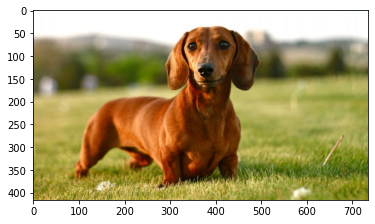

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
model.fit(x_train,y_train)

# Min Max Scaler 
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

i = imread('/content/drive/MyDrive/Colab Notebooks/Computer Vision/images/test_dogsheep/cane.jpg')
img_resized = resize(i,(50,50,3)) 
fltimage=img_resized.flatten()
plt.imshow(i)

print(x_train.shape)
print(x_test.shape)

model2 = KNeighborsClassifier(n_neighbors=2)
model2.fit(x_train,y_train)

y_pred2 = model2.predict(x_test)
y_prediction2 = model2.predict([fltimage])
print("k=2 ->", y_pred2)
print("k=2 ->", y_test)
print("prediction for test image:", y_prediction2)
print("\n")


model3 = KNeighborsClassifier(n_neighbors=3)
model3.fit(x_train,y_train)

y_pred3 = model3.predict(x_test)
y_prediction3 = model3.predict([fltimage])
print("k=3 ->", y_pred3)
print("k=3 ->", y_test)
print("prediction for test image:", y_prediction3)
print("\n")


model4 = KNeighborsClassifier(n_neighbors=4)
model4.fit(x_train,y_train)

y_pred4 = model.predict(x_test)
y_prediction4 = model4.predict([fltimage])
print("k=4 ->", y_pred4)
print("k=4 ->", y_test)
print("prediction for test image:", y_prediction4)



In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_pred2,y_test))
print(accuracy_score(y_pred3,y_test))
print(accuracy_score(y_pred4,y_test))

0.6666666666666666
0.7777777777777778
0.6666666666666666


In [ ]:
print(confusion_matrix(y_pred2,y_test))
print("\n")
print(confusion_matrix(y_pred3,y_test))
print("\n")
print(confusion_matrix(y_pred4,y_test))

[[3 2]
 [2 2]]


[[3 1]
 [2 3]]


[[3 1]
 [2 3]]
